<a href="https://colab.research.google.com/github/gabrielpacheco23/sw-requirements-classifier/blob/main/sw_req_classifier_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carrega bibliotecas necessárias
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import files
# upload_train_csv = files.upload()

In [ ]:
# Carrega dataframe
df = pd.read_csv('/kaggle/input/sw-requirements-dataset/train.csv')

In [ ]:
df.head()

,class,requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...


### Análise dos dados do Dataset

In [ ]:
# Faz o agrupamento das classes com groupby
classes = df.groupby('class')
classes.describe()

requirement                                                            \
            count unique                                                top   
class                                                                         
A              21     21   The product shall be available during normal ...   
F             210    209   For each class within a sequence for a cohort...   
FT             10     10  The product shall create an exception log of p...   
L              10     10  All business rules specified in the Disputes S...   
LF             34     34  The application shall match the color of the s...   
MN             17     17  The product must be designed using Design Patt...   
O              58     58  The product must support Internet Explorer 5.5...   
PE             54     54  The system shall refresh the display every 60 ...   
PO              2      2  The software product is expected to run on Win...   
SC             21     21  The product shall be able to handle up to 1500...   
SE             56     56  The product shall ensure that it can only be a...   
US             63     63   If projected  the data must be readable.  On ...   

            
      freq  
class       
A        1  
F        2  
FT       1  
L        1  
LF       1  
MN       1  
O        1  
PE       1  
PO       1  
SC       1  
SE       1  
US       1

In [ ]:
# Ordenação das classes por quantidade, utilizando quicksort
classes.count().sort_values(by="requirement", ascending=False, kind='quicksort')

,requirement
class,
F,210
US,63
O,58
SE,56
PE,54
LF,34
A,21
SC,21
MN,17


In [ ]:
print(len(classes))

12


In [ ]:
# Teste de tempo de execução do quicksort no dataset
from time import perf_counter

def test_performance():
    perf_list = []
    for _ in range(1000):
        start = perf_counter()
        classes.count().sort_values(by='requirement', ascending=False, kind='quicksort')
        end = perf_counter()
        perf_list.append(end - start)

    print(f'Média do teste de performance: {np.array(perf_list).mean()}')

test_performance()

Média do teste de performance: 0.0004424895180000306


###  Criando a imagem Word Cloud do Dataset

In [ ]:
print(f"Existem {df.shape[0]} amostras e {df.shape[1]} feature(s) neste dataset. \n")

Existem 556 amostras e 2 feature(s) neste dataset. 



In [ ]:
# Primeiro, testamos com apenas um requisito
text = df.requirement[0]
text

'The system shall refresh the display every 60 seconds.'

In [ ]:
# Gera uma imagem word cloud
wordcloud = WordCloud().generate(text)

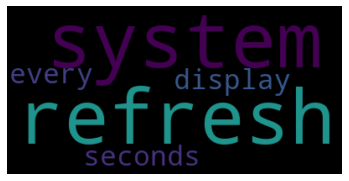

In [ ]:
# Mostra a imagem gerada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

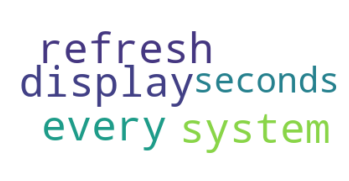

In [ ]:
# Ajusta a imagem
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(req for req in df.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos.")

Existem 65381 palavras na combinação de todos os requisitos.


In [ ]:
# Cria lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(["requirement", "software", "system", "product"])
stopwords.discard('user')

In [ ]:
# Gera uma imagem word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

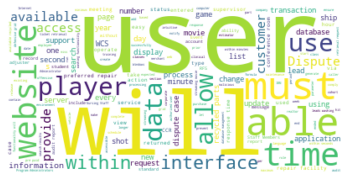

In [ ]:
# Mostra a imagem gerada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Salva a imagem gerada no computador
# wordcloud.to_file("img/sw_req_wordcloud.png")

### Spell correction (correção de erros ortográficos)

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
spell.word_frequency.load_words(['Mozilla', 'Firefox', 'Google', 'Microsoft', 'PC', 'MDI'])

def spell_correct(reqs):
    correct_reqs = []
    for req in reqs:
        new_req = ''
        for word in spell.split_words(req.strip()):
            correction = spell.correction(word)
            new_req += correction + ' ' if correction is not None else word + ' '

        correct_reqs.append(new_req.strip())

    return correct_reqs

In [ ]:
df.requirement = spell_correct(df.requirement)

In [ ]:
df.head()

,class,requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable On a 10...
3,A,The product shall be available during normal b...
4,US,If projected the data must be understandable O...


### Word Cloud para cada classe

#### Classe Functional

In [ ]:
func = df[df['class'] == 'F']
func

,class,requirement
8,F,The system shall have a MDI form that allows f...
9,F,The system shall display Events in a vertical ...
10,F,The system shall display the Events in a graph...
14,F,The Disputes System must be accessible by both...
15,F,The Disputes System must prevent users from ac...
...,...,...
539,F,The system shall provide charts for the Activi...
552,F,The system will use the stored e mail addresse...
553,F,The system will notify affected parties for ro...
554,F,The system will notify affected parties when c...


In [ ]:
text = " ".join(req for req in func.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os funcionais.")

Existem 22293 palavras na combinação de todos os funcionais.


In [ ]:
# Gera uma imagem word cloud
func_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

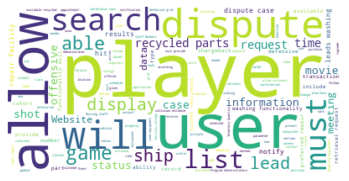

In [ ]:
# Mostra a imagem gerada
plt.imshow(func_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Histograma das 10 palavras mais frequentes dos Funcionais

In [ ]:
import copy

def remove_stopwords(sorted_wc):
  new_wc = copy.deepcopy(sorted_wc)
  for wc in sorted_wc:
    if wc in stopwords:
      new_wc.pop(wc)

  return new_wc

In [ ]:
def plot_most_freq_hist(txt):
  word_count = WordCloud().process_text(txt)

  sorted_wc = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

  sorted_wc = remove_stopwords(sorted_wc)
  most_freq = list(sorted_wc.items())[:10]

  mf = pd.DataFrame(most_freq, columns=['word', 'count'])
  mf.plot(kind='bar', x='word', width=0.9)

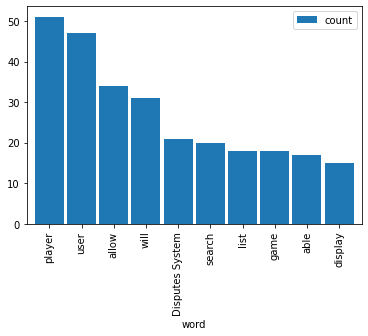

In [ ]:
plot_most_freq_hist(text)

#### Histograma da média do tamanho das sentenças

In [ ]:
def sentence_sizes_mean(reqs):
    sizes = []
    for req in reqs:
        sizes.append(len(req))

    return np.array(sizes).mean()

sentence_size_mean_dict = {}

In [ ]:
sentence_sizes_mean(func.requirement)

105.16190476190476

In [ ]:
sentence_size_mean_dict['functional'] = sentence_sizes_mean(func.requirement)

#### Classe Usability (US)

In [ ]:
usab = df[df['class'] == 'US']
usab

,class,requirement
2,US,If projected the data must be readable On a 10...
4,US,If projected the data must be understandable O...
6,US,The product shall be intuitive and self explan...
48,US,The product shall be easy to use by Adjusters ...
49,US,The product shall increase productivity of Col...
...,...,...
499,US,The system shall be intuitive to the Program A...
500,US,2 out of 3 Program Administrators Nursing Staf...
501,US,The system shall use symbols and words that ar...
502,US,The verbiage used within the system shall be c...


In [ ]:
text = " ".join(req for req in usab.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de usabilidade.")

Existem 8168 palavras na combinação de todos os requisitos de usabilidade.


In [ ]:
usab_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

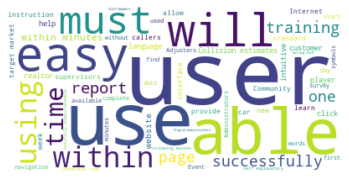

In [ ]:
plt.imshow(usab_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

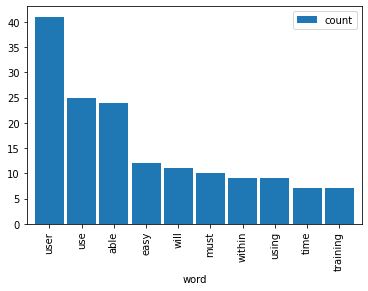

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(usab.requirement)

128.66666666666666

In [ ]:
sentence_size_mean_dict['usability'] = sentence_sizes_mean(usab.requirement)

#### Classe Operational (O)

In [ ]:
op = df[df['class'] == 'O']
op.head()

,class,requirement
39,O,The product must support Internet Explorer 5 5...
40,O,The product must support Mozilla Firefox 1 0 a...
41,O,The product shall interface with the Choice Pa...
42,O,The product shall run on the existing hardware...
43,O,The product shall adhere to the corporate Arch...


In [ ]:
text = " ".join(req for req in op.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de operação.")

Existem 6442 palavras na combinação de todos os requisitos de operação.


In [ ]:
op_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

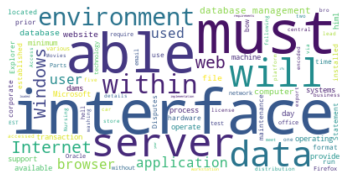

In [ ]:
plt.imshow(op_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

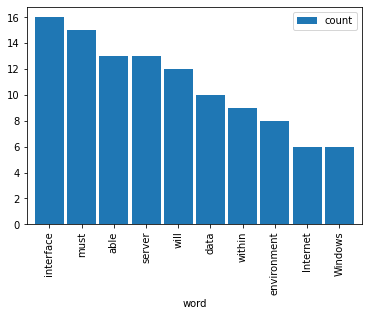

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(op.requirement)

110.08620689655173

In [ ]:
sentence_size_mean_dict['operational'] = sentence_sizes_mean(op.requirement)

#### Classe Security (SE)

In [ ]:
sec = df[df['class'] == 'SE']
sec.head()

,class,requirement
5,SE,The product shall ensure that it can only be a...
67,SE,Only adjusters can request recycled parts audi...
68,SE,Only adjusters with a supervisor role can upda...
69,SE,Only collision estimates shall search for recy...
70,SE,Only valid data shall be entered into the syst...


In [ ]:
text = " ".join(req for req in sec.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de segurança.")

Existem 6777 palavras na combinação de todos os requisitos de segurança.


In [ ]:
sec_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

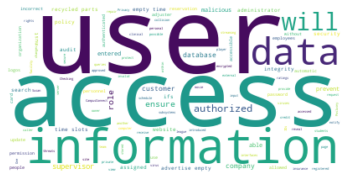

In [ ]:
plt.imshow(sec_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

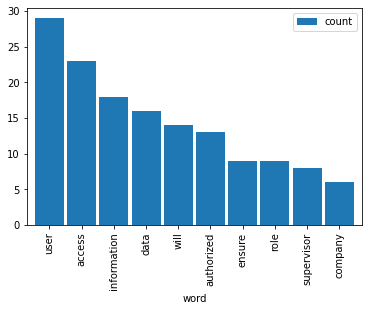

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(sec.requirement)

120.03571428571429

In [ ]:
sentence_size_mean_dict['security'] = sentence_sizes_mean(sec.requirement)

#### Classe Performance (PE)

In [ ]:
perfc = df[df['class'] == 'PE']
perfc.head()

,class,requirement
0,PE,The system shall refresh the display every 60 ...
7,PE,The product shall respond fast to keep up to d...
53,PE,The search for recycled parts shall take no lo...
54,PE,The search for the preferred repair facility s...
55,PE,The recycled parts audit report shall be retur...


In [ ]:
text = " ".join(req for req in perfc.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de desempenho.")

Existem 6816 palavras na combinação de todos os requisitos de desempenho.


In [ ]:
perfc_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

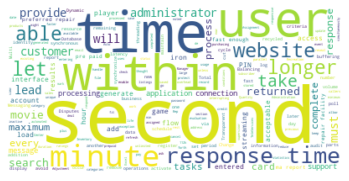

In [ ]:
plt.imshow(perfc_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

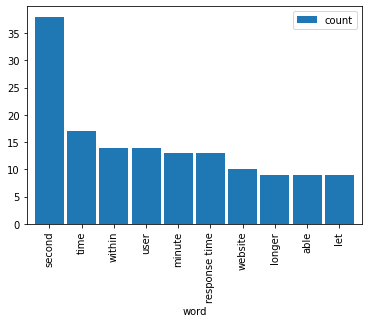

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(perfc.requirement)

125.24074074074075

In [ ]:
sentence_size_mean_dict['performance'] = sentence_sizes_mean(perfc.requirement)

#### Classe Look & Feel (LF)

In [ ]:
lf = df[df['class'] == 'LF']
lf.head()

,class,requirement
1,LF,The application shall match the color of the s...
44,LF,The product shall comply with corporate User I...
45,LF,The product shall comply with corporate color ...
46,LF,The appearance of the product shall appear pro...
118,LF,The product i Look and Feel shall be able to i...


In [ ]:
text = " ".join(req for req in lf.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de aparência.")

Existem 3920 palavras na combinação de todos os requisitos de aparência.


In [ ]:
lf_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

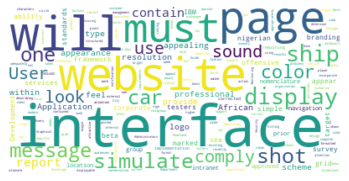

In [ ]:
plt.imshow(lf_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

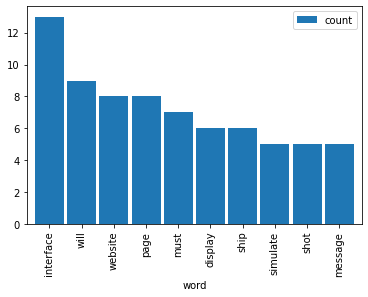

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(lf.requirement)

114.32352941176471

In [ ]:
sentence_size_mean_dict['look and feel'] = sentence_sizes_mean(lf.requirement)

#### Classe Availability (A)

In [ ]:
avail = df[df['class'] == 'A']
avail.head()

,class,requirement
3,A,The product shall be available during normal b...
57,A,The product shall adhere to the corporate onli...
58,A,The product shall achieve a 98 time The produc...
130,A,Aside from server failure the software product...
238,A,The website shall be available for use 24 hour...


In [ ]:
text = " ".join(req for req in avail.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de disponibilidade.")

Existem 2280 palavras na combinação de todos os requisitos de disponibilidade.


In [ ]:
avail_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

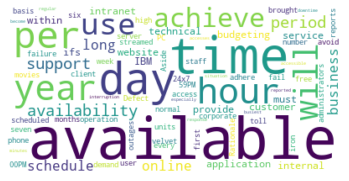

In [ ]:
plt.imshow(avail_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

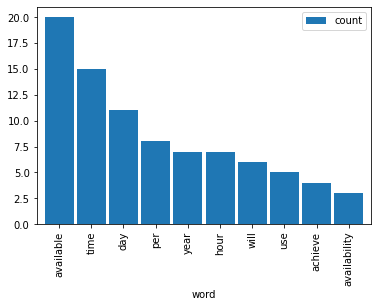

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(avail.requirement)

107.61904761904762

In [ ]:
sentence_size_mean_dict['availability'] = sentence_sizes_mean(avail.requirement)

#### Classe Scalability (SC)

In [ ]:
scala = df[df['class'] == 'SC']
scala.head()

,class,requirement
59,SC,The product shall be able to handle up to 1500...
60,SC,The average number of recycled parts records p...
61,SC,The product shall be able to handle 10 000 con...
132,SC,The product shall be capable of handling up to...
133,SC,The product shall be able to process 10 000 tr...


In [ ]:
text = " ".join(req for req in scala.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de escalabilidade.")

Existem 2291 palavras na combinação de todos os requisitos de escalabilidade.


In [ ]:
scala_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

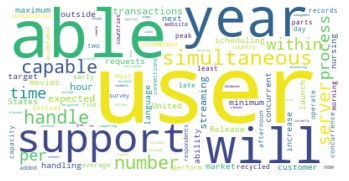

In [ ]:
plt.imshow(scala_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

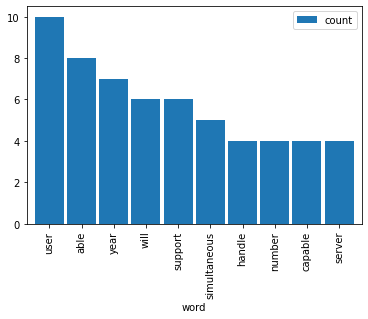

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(scala.requirement)

108.14285714285714

In [ ]:
sentence_size_mean_dict['scalability'] = sentence_sizes_mean(scala.requirement)

#### Classe Maintainability (MN)

In [ ]:
mnt = df[df['class'] == 'MN']
mnt.head()

,class,requirement
143,MN,The product must be designed using Design Patt...
144,MN,The product must be highly configurable for us...
145,MN,Maintenance releases will be offered to custom...
147,MN,The customer shall be able to easily integrate...
247,MN,The product shall be expected to operate withi...


In [ ]:
text = " ".join(req for req in scala.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de manutebilidade.")

Existem 2291 palavras na combinação de todos os requisitos de manutebilidade.


In [ ]:
mnt_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

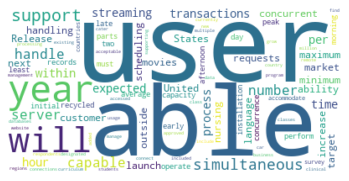

In [ ]:
plt.imshow(mnt_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

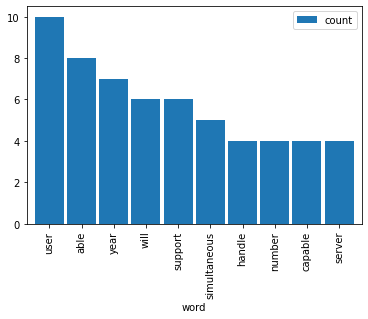

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(mnt.requirement)

166.23529411764707

In [ ]:
sentence_size_mean_dict['maintainability'] = sentence_sizes_mean(mnt.requirement)

#### Classe Fault Tolerance (FT)

In [ ]:
ft = df[df['class'] == 'FT']
ft.head()

,class,requirement
131,FT,The product shall create an exception log of p...
155,FT,The product and or dependent databases filesys...
241,FT,The website shall continue to operate if the s...
242,FT,The website shall continue to operate if the p...
404,FT,The product shall be robust The product shall ...


In [ ]:
text = " ".join(req for req in ft.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de tolerância a erros.")

Existem 1137 palavras na combinação de todos os requisitos de tolerância a erros.


In [ ]:
ft_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

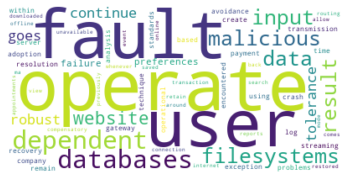

In [ ]:
plt.imshow(ft_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

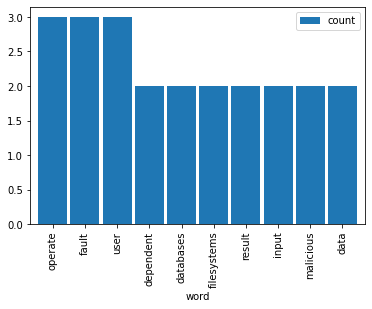

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(ft.requirement)

112.8

In [ ]:
sentence_size_mean_dict['fault tolerance'] = sentence_sizes_mean(ft.requirement)

#### Classe Legal (L)

In [ ]:
legal = df[df['class'] == 'L']
legal.head()

,class,requirement
11,L,All business rules specified in the Disputes S...
12,L,The Disputes application must maintain a detai...
13,L,All actions that modify an existing dispute ca...
74,L,The product must comply with sardines only
75,L,The product shall comply with the estimates la...


In [ ]:
text = " ".join(req for req in legal.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de legalidade.")

Existem 1009 palavras na combinação de todos os requisitos de legalidade.


In [ ]:
legal_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

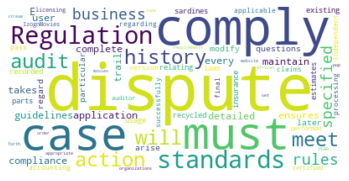

In [ ]:
plt.imshow(legal_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

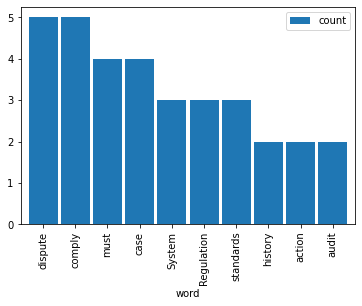

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_sizes_mean(legal.requirement)

100.0

In [ ]:
sentence_size_mean_dict['legal'] = sentence_sizes_mean(legal.requirement)

#### Classe Portability (PO)

In [ ]:
port = df[df['class'] == 'PO']
port.head()

,class,requirement
47,PO,The software product is expected to run on Win...
475,PO,The product is expected to run on Windows CE a...


In [ ]:
text = " ".join(req for req in port.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos de portabilidade.")

Existem 141 palavras na combinação de todos os requisitos de portabilidade.


In [ ]:
port_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

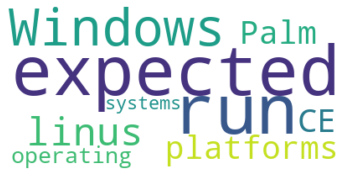

In [ ]:
plt.imshow(port_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

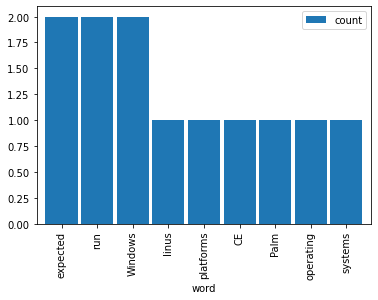

In [ ]:
plot_most_freq_hist(text)

In [ ]:
sentence_size_mean_dict['portability'] = sentence_sizes_mean(port.requirement)

### Word Cloud dos Não-Funcionais

In [ ]:
non_func = df[df['class'] != 'F']
non_func

,class,requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable On a 10...
3,A,The product shall be available during normal b...
4,US,If projected the data must be understandable O...
...,...,...
547,SE,User access should be limited to the permissio...
548,LF,The product must comply with the intranet page...
549,LF,The intranet pages should display appropriatel...
550,US,The users should be able to easily use the sys...


In [ ]:
text = " ".join(req for req in non_func.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos não-funcionais.")

Existem 41833 palavras na combinação de todos os requisitos não-funcionais.


In [ ]:
non_func_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

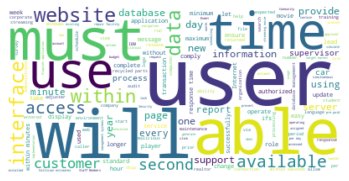

In [ ]:
plt.imshow(non_func_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Histograma das 10 palavras mais frequentes dos Não-Funcionais

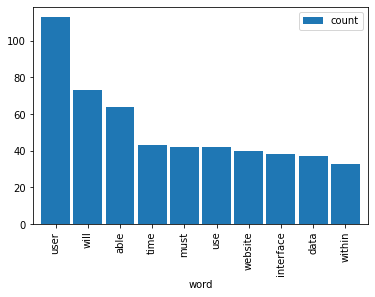

In [ ]:
plot_most_freq_hist(text)

### Histograma das 10 palavras mais frequentes do dataset total

In [ ]:
text = " ".join(req for req in df.requirement)
print(f"Existem {len(text)} palavras na combinação de todos os requisitos do dataset.")

Existem 64127 palavras na combinação de todos os requisitos do dataset.


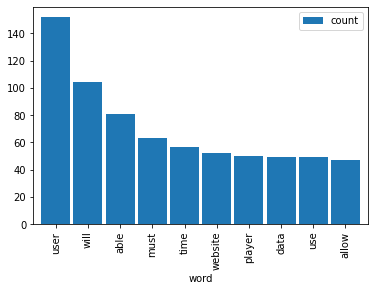

In [ ]:
plot_most_freq_hist(text)

### Histograma da média do tamanho das sentenças em cada classe

<AxesSubplot:xlabel='class'>

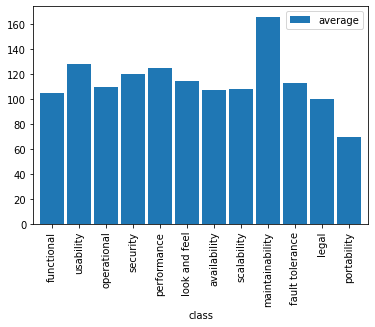

In [ ]:
sen_size_items = list(sentence_size_mean_dict.items())
sen_sizes_mean_df = pd.DataFrame(sen_size_items, columns=['class', 'average'])
sen_sizes_mean_df.plot(kind='bar', x='class', width=0.9)

## Usando BERT

In [ ]:
!pip install transformers
from transformers import BertTokenizer, BertModel
import torch
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
labels = {
  'F': 0,
  'A': 1,
  'FT': 2,
  'L': 3,
  'LF': 4,
  'MN': 5,
  'O': 6,
  'PE': 7,
  'PO': 8,
  'SC': 9,
  'SE': 10,
  'US': 11
}

In [ ]:
class ReqDataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = [labels[label] for label in df['class']]
        self.texts = [tokenizer(text, padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['requirement']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])
print(len(df_train),len(df_val), len(df_test))

444 56 56


In [ ]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):
        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 12)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask, return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = BertClassifier()

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#%pip install tensorboard

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, learning_rate, epochs, batch=15):
    train = ReqDataset(train_data)
    train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch, shuffle=True)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    if use_cuda:
            model = model.cuda()
            criterion = criterion.cuda()

    model.train()

    for epoch_num in range(epochs):
            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):
                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                writer.add_scalar("Loss/train", total_loss_train, epoch_num)

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                writer.add_scalar("Accuracy/train", total_acc_train, epoch_num)

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f}')

In [ ]:
def evaluate(model, test_data, batch=15):
    test = ReqDataset(test_data)
    test_dataloader = torch.utils.data.DataLoader(test, batch_size=batch)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    predicted = []

    if use_cuda:
        model = model.cuda()

    model.eval()

    total_acc_test = 0
    with torch.no_grad():
        for test_input, test_label in test_dataloader:
              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              predicted.append(output)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc

              writer.add_scalar("Accuracy/test", total_acc_test)

    writer.flush()
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    return predicted

## Classificação de 2 categorias (Funcional e Não-Funcional)

In [ ]:
# dataset com 2 classes
df_copy = df.copy()
df_copy.loc[df_copy['class'] != 'F', 'class'] = 'NF'

In [ ]:
df_copy

,class,requirement
0,NF,The system shall refresh the display every 60 ...
1,NF,The application shall match the color of the s...
2,NF,If projected the data must be readable On a 10...
3,NF,The product shall be available during normal b...
4,NF,If projected the data must be understandable O...
...,...,...
551,NF,The product interface should be fast The respo...
552,F,The system will use the stored e mail addresse...
553,F,The system will notify affected parties for ro...
554,F,The system will notify affected parties when c...


In [ ]:
np.random.seed(112)
df_copy_train, df_copy_val, df_copy_test = np.split(df_copy.sample(frac=1, random_state=42),
                                     [int(.8*len(df_copy)), int(.9*len(df_copy))])
print(len(df_copy_train),len(df_copy_val), len(df_copy_test))

444 56 56


In [ ]:
labels = {'F': 0, 'NF': 1}

In [ ]:
model_two = BertClassifier()
model_two.linear = nn.Linear(768, 2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
torch.cuda.empty_cache()

In [ ]:
# TREINANDO COM 100 EPOCAS (2 CLASSES)
EPOCHS = 100
LR = 1e-6

train(model_two, df_copy_train, LR, EPOCHS, batch=15)

100%|██████████| 30/30 [00:38<00:00,  1.30s/it]


Epochs: 1 | Train Loss:  0.050                 | Train Accuracy:  0.394


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 2 | Train Loss:  0.049                 | Train Accuracy:  0.414


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 3 | Train Loss:  0.048                 | Train Accuracy:  0.455


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 4 | Train Loss:  0.047                 | Train Accuracy:  0.493


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 5 | Train Loss:  0.046                 | Train Accuracy:  0.541


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 6 | Train Loss:  0.046                 | Train Accuracy:  0.574


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 7 | Train Loss:  0.044                 | Train Accuracy:  0.597


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 8 | Train Loss:  0.044                 | Train Accuracy:  0.608


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 9 | Train Loss:  0.042                 | Train Accuracy:  0.653


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 10 | Train Loss:  0.041                 | Train Accuracy:  0.703


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 11 | Train Loss:  0.039                 | Train Accuracy:  0.739


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 12 | Train Loss:  0.038                 | Train Accuracy:  0.757


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 13 | Train Loss:  0.035                 | Train Accuracy:  0.827


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 14 | Train Loss:  0.032                 | Train Accuracy:  0.813


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 15 | Train Loss:  0.033                 | Train Accuracy:  0.824


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 16 | Train Loss:  0.029                 | Train Accuracy:  0.874


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 17 | Train Loss:  0.027                 | Train Accuracy:  0.881


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 18 | Train Loss:  0.027                 | Train Accuracy:  0.885


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 19 | Train Loss:  0.025                 | Train Accuracy:  0.892


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 20 | Train Loss:  0.022                 | Train Accuracy:  0.919


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 21 | Train Loss:  0.022                 | Train Accuracy:  0.914


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 22 | Train Loss:  0.021                 | Train Accuracy:  0.932


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 23 | Train Loss:  0.019                 | Train Accuracy:  0.941


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 24 | Train Loss:  0.018                 | Train Accuracy:  0.950


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 25 | Train Loss:  0.017                 | Train Accuracy:  0.953


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 26 | Train Loss:  0.014                 | Train Accuracy:  0.973


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 27 | Train Loss:  0.014                 | Train Accuracy:  0.977


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 28 | Train Loss:  0.013                 | Train Accuracy:  0.964


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 29 | Train Loss:  0.012                 | Train Accuracy:  0.975


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 30 | Train Loss:  0.012                 | Train Accuracy:  0.982


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 31 | Train Loss:  0.012                 | Train Accuracy:  0.980


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 32 | Train Loss:  0.012                 | Train Accuracy:  0.982


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 33 | Train Loss:  0.010                 | Train Accuracy:  0.986


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 34 | Train Loss:  0.010                 | Train Accuracy:  0.986


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 35 | Train Loss:  0.009                 | Train Accuracy:  0.989


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 36 | Train Loss:  0.009                 | Train Accuracy:  0.986


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 37 | Train Loss:  0.008                 | Train Accuracy:  0.991


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 38 | Train Loss:  0.008                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 39 | Train Loss:  0.008                 | Train Accuracy:  0.991


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 40 | Train Loss:  0.007                 | Train Accuracy:  0.991


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 41 | Train Loss:  0.007                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 42 | Train Loss:  0.007                 | Train Accuracy:  0.993


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 43 | Train Loss:  0.006                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 44 | Train Loss:  0.006                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 45 | Train Loss:  0.006                 | Train Accuracy:  0.993


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 46 | Train Loss:  0.006                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 47 | Train Loss:  0.006                 | Train Accuracy:  0.993


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 48 | Train Loss:  0.005                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 49 | Train Loss:  0.005                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 50 | Train Loss:  0.005                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 51 | Train Loss:  0.004                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 52 | Train Loss:  0.004                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 53 | Train Loss:  0.004                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 54 | Train Loss:  0.004                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 55 | Train Loss:  0.004                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 56 | Train Loss:  0.003                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 57 | Train Loss:  0.004                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 58 | Train Loss:  0.004                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 59 | Train Loss:  0.004                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 60 | Train Loss:  0.003                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 61 | Train Loss:  0.004                 | Train Accuracy:  0.993


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 62 | Train Loss:  0.003                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 63 | Train Loss:  0.003                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 64 | Train Loss:  0.003                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 65 | Train Loss:  0.003                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 66 | Train Loss:  0.003                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 67 | Train Loss:  0.002                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 68 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 69 | Train Loss:  0.002                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 70 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 71 | Train Loss:  0.003                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 72 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 73 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 74 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 75 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 76 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 77 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 78 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 79 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 80 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 81 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 82 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 83 | Train Loss:  0.002                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 84 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 85 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 86 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 87 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 88 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 89 | Train Loss:  0.002                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 90 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 91 | Train Loss:  0.001                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 92 | Train Loss:  0.001                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 93 | Train Loss:  0.002                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 94 | Train Loss:  0.001                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 95 | Train Loss:  0.001                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 96 | Train Loss:  0.001                 | Train Accuracy:  0.995


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 97 | Train Loss:  0.001                 | Train Accuracy:  1.000


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 98 | Train Loss:  0.001                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 99 | Train Loss:  0.001                 | Train Accuracy:  0.998


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]

Epochs: 100 | Train Loss:  0.001                 | Train Accuracy:  0.998


In [ ]:
predicted = evaluate(model_two, df_copy_test, batch=15)

Test Accuracy:  0.893


### Matriz de confusão para classificação de 2 classes

In [ ]:
def convert_to_label(pred_values):
    new_pred = []
    for value in pred_values:
        if value[0].item() > value[1].item():
            new_pred.append(0)
        else:
            new_pred.append(1)
    return new_pred

In [ ]:
from sklearn.metrics import confusion_matrix

labels = {'F': 0, 'NF': 1}

pred = torch.cat(predicted).cpu()

y_test = df_copy_test['class']
labels_nums = y_test.map(labels)

labels_repr = np.array(labels_nums)
pred = np.array(convert_to_label(pred))

confusion_matrix(labels_repr, pred)

array([[15,  4],
       [ 2, 35]])

In [ ]:
columns = [f'Predicted {label}' for label in labels]
indices = [f'Actual {label}' for label in labels]

cm_table = pd.DataFrame(confusion_matrix(labels_repr, pred), index=indices, columns=columns)
cm_table

,Predicted F,Predicted NF
Actual F,15,4
Actual NF,2,35


<AxesSubplot:>

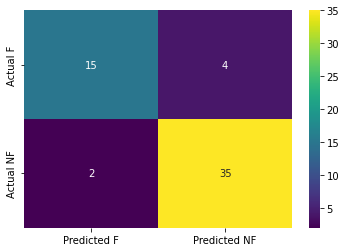

In [ ]:
import seaborn as sns

sns.heatmap(cm_table, annot=True, fmt='d', cmap='viridis')

## Classificação de 12 classes

In [ ]:
print(model.linear)

Linear(in_features=768, out_features=12, bias=True)


In [ ]:
labels = {
  'F': 0,
  'A': 1,
  'FT': 2,
  'L': 3,
  'LF': 4,
  'MN': 5,
  'O': 6,
  'PE': 7,
  'PO': 8,
  'SC': 9,
  'SE': 10,
  'US': 11
}

In [ ]:
model = BertClassifier()
model.linear = nn.Linear(768, 12)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# TREINANDO COM 120 EPOCAS (12 CLASSES)
EPOCHS = 120

train(model, df_train, LR, EPOCHS, batch=15)

100%|██████████| 30/30 [00:40<00:00,  1.35s/it]


Epochs: 1 | Train Loss:  0.175                 | Train Accuracy:  0.061


100%|██████████| 30/30 [00:41<00:00,  1.38s/it]


Epochs: 2 | Train Loss:  0.173                 | Train Accuracy:  0.070


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 3 | Train Loss:  0.171                 | Train Accuracy:  0.074


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 4 | Train Loss:  0.171                 | Train Accuracy:  0.081


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 5 | Train Loss:  0.169                 | Train Accuracy:  0.095


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 6 | Train Loss:  0.165                 | Train Accuracy:  0.149


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 7 | Train Loss:  0.162                 | Train Accuracy:  0.162


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 8 | Train Loss:  0.159                 | Train Accuracy:  0.248


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 9 | Train Loss:  0.155                 | Train Accuracy:  0.282


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 10 | Train Loss:  0.148                 | Train Accuracy:  0.374


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 11 | Train Loss:  0.146                 | Train Accuracy:  0.392


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 12 | Train Loss:  0.143                 | Train Accuracy:  0.378


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 13 | Train Loss:  0.140                 | Train Accuracy:  0.396


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 14 | Train Loss:  0.138                 | Train Accuracy:  0.399


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 15 | Train Loss:  0.136                 | Train Accuracy:  0.390


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 16 | Train Loss:  0.134                 | Train Accuracy:  0.421


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 17 | Train Loss:  0.131                 | Train Accuracy:  0.428


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 18 | Train Loss:  0.129                 | Train Accuracy:  0.423


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 19 | Train Loss:  0.129                 | Train Accuracy:  0.430


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 20 | Train Loss:  0.124                 | Train Accuracy:  0.430


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 21 | Train Loss:  0.124                 | Train Accuracy:  0.432


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 22 | Train Loss:  0.122                 | Train Accuracy:  0.453


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 23 | Train Loss:  0.120                 | Train Accuracy:  0.441


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 24 | Train Loss:  0.119                 | Train Accuracy:  0.457


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 25 | Train Loss:  0.117                 | Train Accuracy:  0.444


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 26 | Train Loss:  0.117                 | Train Accuracy:  0.455


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 27 | Train Loss:  0.116                 | Train Accuracy:  0.444


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 28 | Train Loss:  0.114                 | Train Accuracy:  0.457


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 29 | Train Loss:  0.113                 | Train Accuracy:  0.480


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 30 | Train Loss:  0.112                 | Train Accuracy:  0.466


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 31 | Train Loss:  0.110                 | Train Accuracy:  0.486


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 32 | Train Loss:  0.109                 | Train Accuracy:  0.498


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 33 | Train Loss:  0.107                 | Train Accuracy:  0.486


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 34 | Train Loss:  0.109                 | Train Accuracy:  0.462


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 35 | Train Loss:  0.106                 | Train Accuracy:  0.502


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 36 | Train Loss:  0.105                 | Train Accuracy:  0.498


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 37 | Train Loss:  0.103                 | Train Accuracy:  0.532


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 38 | Train Loss:  0.102                 | Train Accuracy:  0.516


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 39 | Train Loss:  0.101                 | Train Accuracy:  0.534


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 40 | Train Loss:  0.101                 | Train Accuracy:  0.536


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 41 | Train Loss:  0.100                 | Train Accuracy:  0.550


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 42 | Train Loss:  0.098                 | Train Accuracy:  0.536


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 43 | Train Loss:  0.095                 | Train Accuracy:  0.590


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 44 | Train Loss:  0.095                 | Train Accuracy:  0.581


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 45 | Train Loss:  0.094                 | Train Accuracy:  0.601


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 46 | Train Loss:  0.095                 | Train Accuracy:  0.581


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 47 | Train Loss:  0.091                 | Train Accuracy:  0.615


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 48 | Train Loss:  0.093                 | Train Accuracy:  0.590


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 49 | Train Loss:  0.091                 | Train Accuracy:  0.619


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 50 | Train Loss:  0.092                 | Train Accuracy:  0.610


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 51 | Train Loss:  0.089                 | Train Accuracy:  0.622


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 52 | Train Loss:  0.088                 | Train Accuracy:  0.662


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 53 | Train Loss:  0.087                 | Train Accuracy:  0.680


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 54 | Train Loss:  0.086                 | Train Accuracy:  0.628


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 55 | Train Loss:  0.084                 | Train Accuracy:  0.691


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 56 | Train Loss:  0.084                 | Train Accuracy:  0.676


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 57 | Train Loss:  0.084                 | Train Accuracy:  0.689


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 58 | Train Loss:  0.080                 | Train Accuracy:  0.718


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 59 | Train Loss:  0.081                 | Train Accuracy:  0.712


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 60 | Train Loss:  0.080                 | Train Accuracy:  0.709


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 61 | Train Loss:  0.079                 | Train Accuracy:  0.712


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 62 | Train Loss:  0.080                 | Train Accuracy:  0.714


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 63 | Train Loss:  0.077                 | Train Accuracy:  0.709


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 64 | Train Loss:  0.077                 | Train Accuracy:  0.727


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 65 | Train Loss:  0.074                 | Train Accuracy:  0.725


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 66 | Train Loss:  0.075                 | Train Accuracy:  0.732


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 67 | Train Loss:  0.075                 | Train Accuracy:  0.743


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 68 | Train Loss:  0.073                 | Train Accuracy:  0.752


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 69 | Train Loss:  0.071                 | Train Accuracy:  0.748


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 70 | Train Loss:  0.072                 | Train Accuracy:  0.745


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 71 | Train Loss:  0.071                 | Train Accuracy:  0.764


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 72 | Train Loss:  0.070                 | Train Accuracy:  0.766


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 73 | Train Loss:  0.069                 | Train Accuracy:  0.782


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 74 | Train Loss:  0.067                 | Train Accuracy:  0.768


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 75 | Train Loss:  0.068                 | Train Accuracy:  0.770


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 76 | Train Loss:  0.065                 | Train Accuracy:  0.791


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 77 | Train Loss:  0.065                 | Train Accuracy:  0.804


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 78 | Train Loss:  0.065                 | Train Accuracy:  0.786


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 79 | Train Loss:  0.064                 | Train Accuracy:  0.797


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 80 | Train Loss:  0.065                 | Train Accuracy:  0.784


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 81 | Train Loss:  0.064                 | Train Accuracy:  0.800


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 82 | Train Loss:  0.063                 | Train Accuracy:  0.797


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 83 | Train Loss:  0.061                 | Train Accuracy:  0.806


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 84 | Train Loss:  0.057                 | Train Accuracy:  0.829


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 85 | Train Loss:  0.059                 | Train Accuracy:  0.809


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 86 | Train Loss:  0.058                 | Train Accuracy:  0.833


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 87 | Train Loss:  0.058                 | Train Accuracy:  0.827


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 88 | Train Loss:  0.056                 | Train Accuracy:  0.824


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 89 | Train Loss:  0.056                 | Train Accuracy:  0.831


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 90 | Train Loss:  0.054                 | Train Accuracy:  0.854


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 91 | Train Loss:  0.053                 | Train Accuracy:  0.845


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 92 | Train Loss:  0.054                 | Train Accuracy:  0.856


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 93 | Train Loss:  0.053                 | Train Accuracy:  0.840


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 94 | Train Loss:  0.050                 | Train Accuracy:  0.858


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 95 | Train Loss:  0.053                 | Train Accuracy:  0.836


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 96 | Train Loss:  0.050                 | Train Accuracy:  0.858


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 97 | Train Loss:  0.050                 | Train Accuracy:  0.865


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 98 | Train Loss:  0.049                 | Train Accuracy:  0.867


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 99 | Train Loss:  0.049                 | Train Accuracy:  0.856


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 100 | Train Loss:  0.047                 | Train Accuracy:  0.874


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 101 | Train Loss:  0.047                 | Train Accuracy:  0.869


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 102 | Train Loss:  0.048                 | Train Accuracy:  0.867


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 103 | Train Loss:  0.046                 | Train Accuracy:  0.858


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 104 | Train Loss:  0.046                 | Train Accuracy:  0.874


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 105 | Train Loss:  0.044                 | Train Accuracy:  0.874


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 106 | Train Loss:  0.044                 | Train Accuracy:  0.874


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 107 | Train Loss:  0.043                 | Train Accuracy:  0.876


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 108 | Train Loss:  0.043                 | Train Accuracy:  0.881


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 109 | Train Loss:  0.042                 | Train Accuracy:  0.876


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 110 | Train Loss:  0.041                 | Train Accuracy:  0.885


100%|██████████| 30/30 [00:41<00:00,  1.37s/it]


Epochs: 111 | Train Loss:  0.042                 | Train Accuracy:  0.872


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 112 | Train Loss:  0.041                 | Train Accuracy:  0.876


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 113 | Train Loss:  0.039                 | Train Accuracy:  0.878


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 114 | Train Loss:  0.039                 | Train Accuracy:  0.878


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


Epochs: 115 | Train Loss:  0.040                 | Train Accuracy:  0.878


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 116 | Train Loss:  0.038                 | Train Accuracy:  0.878


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 117 | Train Loss:  0.040                 | Train Accuracy:  0.876


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 118 | Train Loss:  0.038                 | Train Accuracy:  0.881


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epochs: 119 | Train Loss:  0.036                 | Train Accuracy:  0.883


100%|██████████| 30/30 [00:40<00:00,  1.37s/it]

Epochs: 120 | Train Loss:  0.036                 | Train Accuracy:  0.883


In [ ]:
predicted_12 = evaluate(model, df_test, batch=15)

Test Accuracy:  0.679


### Rodando o TensorBoard

In [ ]:
# PASSOS NECESSÁRIOS PARA RODAR O TENSORBOARD NO KAGGLE
# Instalando ngrok (reverse proxy) e o token de autenticação

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ./ngrok-stable-linux-amd64.zip
!./ngrok authtoken 2KQp95V26WL0tyk7rmItJ7ch2GU_5yGyJjAgK7E1HsC6XJqZy

--2023-01-17 01:28:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.16’

ngrok-stable-linux- 100%[===================>]  13.19M  43.8MB/s    in 0.3s    

2023-01-17 01:28:45 (43.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.16’ saved [13832437/13832437]

Archive:  ./ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
authtoken: 2KQp95V26WL0tyk7rmItJ7ch2GU_5yGyJjAgK7E1HsC6XJqZy


In [ ]:
# PASSOS NECESSÁRIOS PARA RODAR O TENSORBOARD NO KAGGLE
# Inicializando TensorBoard no Kaggle com ngrok (reverse proxy)

import os
import multiprocessing

pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./runs/ --host 0.0.0.0 --port 60946 &",
                        "./ngrok http 60946 &"
                        ]]

2023-01-17 01:30:36.200467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 01:30:36.201274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 01:30:36.210699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 01:30:36.211286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 01:30:36.212127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
# PASSOS NECESSÁRIOS PARA RODAR O TENSORBOARD NO KAGGLE
# Gerando link do TensorBoard

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://0a29-104-198-135-65.ngrok.io
